In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [4]:
from pyEDM import *

In [23]:
observations_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/'

In [24]:
ndvi_anom_table = pd.read_csv(observations_tables+'ndvi_table_anomT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])


In [25]:
ndvi_anom_tableT = ndvi_anom_table.T

In [26]:
ndvi_anom_tableT.reset_index(drop=True, inplace=True)
ndvi_anom_tableT

,0,1,2,3,4,5,6,7,8,9,...,392932,392933,392934,392935,392936,392937,392938,392939,392940,392941
0,1.101671,1.267218,0.938137,1.100588,1.324199,1.315054,1.165266,1.113739,0.995424,1.331126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.981070,1.093294,0.873698,1.124495,1.246212,1.232029,1.013628,0.881350,0.986223,1.310523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.620074,0.497290,0.323125,0.514614,1.014546,0.785064,0.773919,0.555548,0.556693,0.720380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.039260,0.837557,0.609005,0.773013,1.242413,1.024316,1.137690,0.987828,1.089278,1.286157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.971371,0.751863,0.467435,0.481555,1.118889,0.952852,1.045681,0.991793,0.930235,0.796915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0.208073,0.026296,-0.284296,0.197938,-0.367827,-0.628079,-0.157488,-0.532811,-0.979176,-0.508893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,0.522922,0.110877,-0.002413,0.636307,-0.054164,-0.157637,0.066254,-0.048598,-0.132028,0.265398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,0.331863,-0.081993,-0.378869,-0.353615,-0.445762,-0.467402,-0.187034,-0.058811,0.460797,0.651812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,0.306670,-0.136034,-0.296636,0.203851,-0.584455,-0.485288,-0.248363,-0.311625,-0.056771,0.484504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
predictions_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/predictions_tables/'

In [90]:
ndvi_ea_simplex_ed6_pi18 = pd.read_csv(predictions_tables + 'ndvi_ea_simplex_ed6_pi18_anom.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [91]:
ndvi_ea_simplex_ed6_pi18.columns = list(range(392942))

In [106]:
ndvi_ea_simplex_ed6_pi18

,0,1,2,3,4,5,6,7,8,9,...,392932,392933,392934,392935,392936,392937,392938,392939,392940,392941
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,1.272178,1.109416,0.504060,0.888538,0.712268,0.583111,0.949876,0.864336,0.891207,0.940751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,0.855924,0.777960,0.315089,0.496933,0.213619,0.503437,0.809615,0.946523,0.921956,0.964949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,0.585819,0.259571,0.055534,0.219499,0.051771,0.218789,0.743226,0.627108,0.944712,0.887054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,0.189517,0.140615,0.138936,0.204151,0.271929,0.400494,0.389669,0.307855,0.680783,0.650297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
stats.pearsonr(ndvi_ea_simplex_ed6_pi18[0][18:-18],ndvi_anom_tableT[0][23:])

(0.718830882280622, 8.368873541958552e-94)

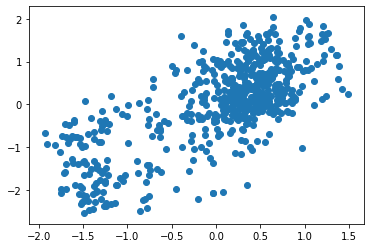

In [103]:
plt.scatter(ndvi_ea_simplex_ed6_pi18[0][18:-18],ndvi_anom_tableT[0][23:])

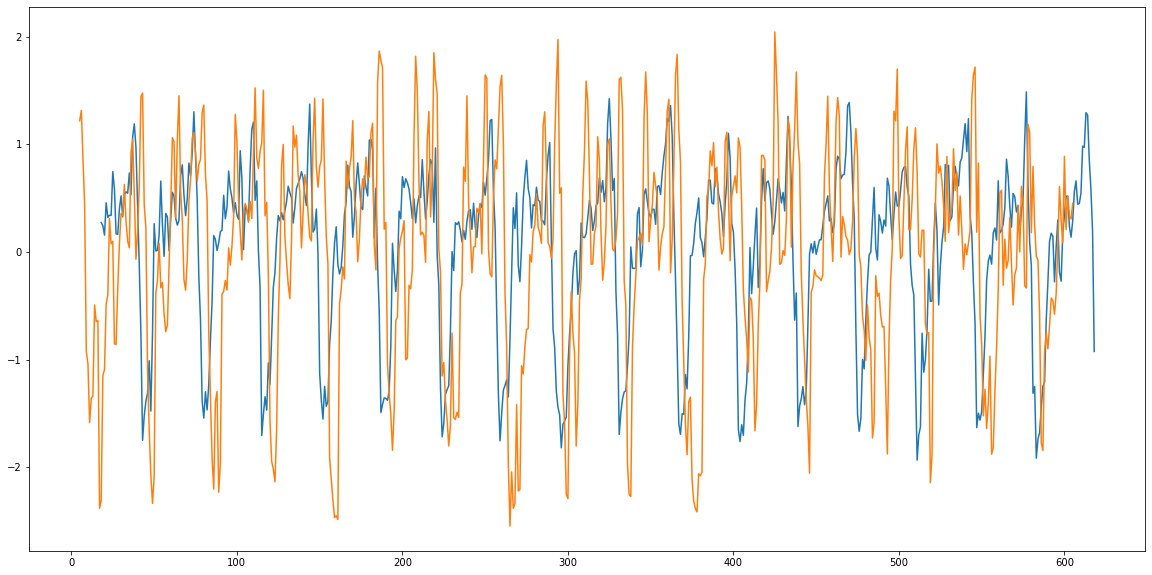

In [17]:
fig = plt.figure(figsize = (20,10))
plt.plot(list(range(619)), ndvi_ea_simplex_ed6_pi18[0])
plt.plot(list(np.arange(5,606)), ndvi_anom_tableT[0][5:])

In [18]:
test = ndvi_anom_tableT[69701][5:]
test.reset_index(drop=True,inplace=True)

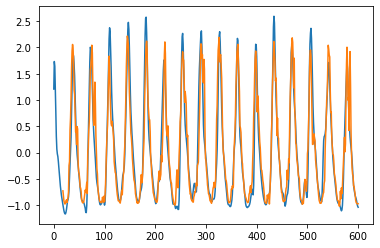

In [19]:
plt.plot(test)
plt.plot(ndvi_ea_simplex_ed6_pi18[69701][:-18])

In [20]:
#ndvi_ea_simplex_ed6_pi18[69701][:20]

In [21]:
#ndvi_anom_tableT[69701][5:25]

In [35]:
lc_pixels_skill = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill.csv',index_col=[0])

In [51]:
bo_pix = list(lc_pixels_skill[lc_pixels_skill.LC == 'woodland']['pixel_id'])


In [62]:
lc_pixels_skill[(lc_pixels_skill.LC == 'cropland_rainfed') & (lc_pixels_skill.skill < 0.1)]

,pixel_id,LC,skill
21386,124568,cropland_rainfed,-0.027094
45828,164094,cropland_rainfed,0.084534
53823,175769,cropland_rainfed,0.088538
55788,178730,cropland_rainfed,0.091399
59699,184497,cropland_rainfed,-0.010497
...,...,...,...
99383,294566,cropland_rainfed,0.092216
99613,295732,cropland_rainfed,0.013995
107537,337317,cropland_rainfed,0.001725
109088,346594,cropland_rainfed,0.077552


In [63]:
high_cr_pix = list(lc_pixels_skill[(lc_pixels_skill.LC == 'cropland_rainfed') & (lc_pixels_skill.skill > 0.9)]['pixel_id'])
low_cr_pix = list(lc_pixels_skill[(lc_pixels_skill.LC == 'cropland_rainfed') & (lc_pixels_skill.skill < 0.1)]['pixel_id'])

In [36]:
low_pixels = list(lc_pixels_skill[lc_pixels_skill.skill < 0.1]['pixel_id'])
high_pixels = list(lc_pixels_skill[lc_pixels_skill.skill > 0.9]['pixel_id'])

In [40]:
low_pixels[:5]

[32861, 38053, 47983, 52709, 53295]

In [41]:
high_pixels[:5]

[26985, 26986, 27568, 28151, 30486]

In [24]:
low_ndvi_pixels = ndvi_anom_tableT[low_pixels]
high_ndvi_pixels = ndvi_anom_tableT[high_pixels]

In [25]:
range_low_ndvi = low_ndvi_pixels.max(axis=0)-low_ndvi_pixels.min(axis=0)
range_high_ndvi = high_ndvi_pixels.max(axis=0)-high_ndvi_pixels.min(axis=0)

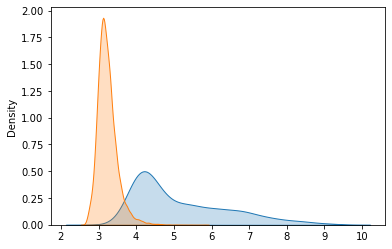

In [26]:
sns.kdeplot(list(range_low_ndvi), shade=True, x= 'NDVI Anom Range')
sns.kdeplot(list(range_high_ndvi), shade=True, x = 'NDVI Anom Range')


In [27]:
precip_orig_table = pd.read_csv(observations_tables+'precip_table_origT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [114]:
ndvi_orig_table = pd.read_csv(observations_tables+'ndvi_table_origT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [115]:
ndvi_orig_table = (ndvi_orig_table-100)/100

In [117]:
ndvi_orig_tableT = ndvi_orig_table.T

In [140]:
precip_data = precip_orig_table.T

In [143]:
low_precip_pixels = precip_data[low_pixels]
high_precip_pixels = precip_data[high_pixels]

In [144]:
range_low_precip = low_precip_pixels.max(axis=0)-low_precip_pixels.min(axis=0)
range_high_precip = high_precip_pixels.max(axis=0)-high_precip_pixels.min(axis=0)

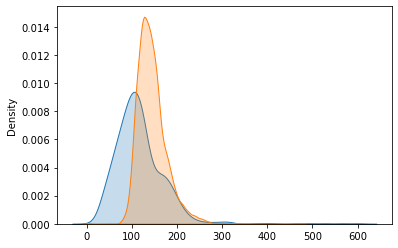

In [146]:
sns.kdeplot(list(range_low_precip), shade=True)
sns.kdeplot(list(range_high_precip), shade=True)


In [35]:
low_ndvi_origT_pixels = ndvi_orig_tableT[low_pixels]
high_ndvi_origT_pixels = ndvi_orig_tableT[high_pixels]

In [37]:
range_low_ndvi_origT = low_ndvi_origT_pixels.max(axis=0)-low_ndvi_origT_pixels.min(axis=0)
range_high_ndvi_origT = high_ndvi_origT_pixels.max(axis=0)-high_ndvi_origT_pixels.min(axis=0)

Text(0, 0.5, 'Probability Density')

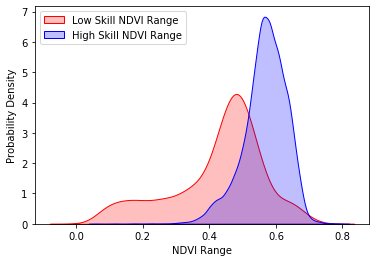

In [49]:
sns.kdeplot(list(range_low_ndvi_origT), shade=True, color = 'r', Label= 'Low Skill NDVI Range')
sns.kdeplot(list(range_high_ndvi_origT), shade=True, color = 'b', Label = 'High Skill NDVI Range')
plt.legend(loc = 2)
plt.xlabel('NDVI Range') 
plt.ylabel('Probability Density')

In [96]:
max_low_ndvi_origT = low_ndvi_origT_pixels.max(axis=0)
max_high_ndvi_origT = high_ndvi_origT_pixels.max(axis=0)

In [ ]:
max_low_ndvi_origT[max_low_ndvi_origT>0.5]

Text(0, 0.5, 'Probability Density')

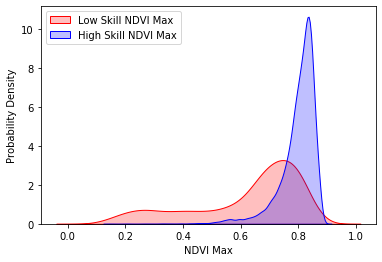

In [51]:
sns.kdeplot(list(max_low_ndvi_origT), shade=True, color = 'r', Label= 'Low Skill NDVI Max')
sns.kdeplot(list(max_high_ndvi_origT), shade=True, color = 'b', Label = 'High Skill NDVI Max')
plt.legend(loc = 2)
plt.xlabel('NDVI Max') 
plt.ylabel('Probability Density')

In [52]:
min_low_ndvi_origT = low_ndvi_origT_pixels.min(axis=0)
min_high_ndvi_origT = high_ndvi_origT_pixels.min(axis=0)

Text(0, 0.5, 'Probability Density')

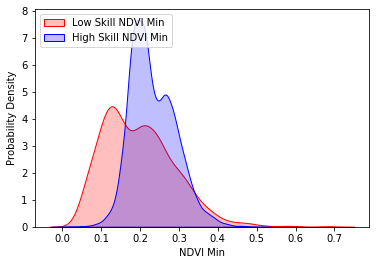

In [53]:
sns.kdeplot(list(min_low_ndvi_origT), shade=True, color = 'r', Label= 'Low Skill NDVI Min')
sns.kdeplot(list(min_high_ndvi_origT), shade=True, color = 'b', Label = 'High Skill NDVI Min')
plt.legend(loc = 2)
plt.xlabel('NDVI Min') 
plt.ylabel('Probability Density')

do the places with small ranges also have low min/max to begin with?

how to do the climatological anomalies relate to pred skill?

In [56]:
ndvi_table_clim_anomT = pd.read_csv(observations_tables + 'ndvi_table_anom2T.csv', delimiter = ',', engine = 'c', low_memory=False, index_col=[0])

In [59]:
ndvi_table_clim_anom = ndvi_table_clim_anomT.T

In [63]:
low_ndvi_clim_anom = ndvi_table_clim_anom[low_pixels]
high_ndvi_clim_anom = ndvi_table_clim_anom[high_pixels]

In [66]:
max_low_ndvi_clim_anom = low_ndvi_clim_anom.max(axis=0)
max_high_ndvi_clim_anom = high_ndvi_clim_anom.max(axis=0)

Text(0, 0.5, 'Probability Density')

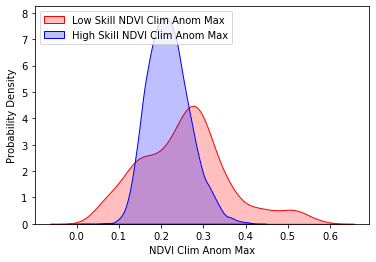

In [68]:
sns.kdeplot(list(max_low_ndvi_clim_anom), shade=True, color = 'r', Label= 'Low Skill NDVI Clim Anom Max')
sns.kdeplot(list(max_high_ndvi_clim_anom), shade=True, color = 'b', Label = 'High Skill NDVI Clim Anom Max')
plt.legend(loc = 2)
plt.xlabel('NDVI Clim Anom Max') 
plt.ylabel('Probability Density')

In [77]:
min_low_ndvi_clim_anom = low_ndvi_clim_anom.min(axis=0)
min_high_ndvi_clim_anom = high_ndvi_clim_anom.min(axis=0)

Text(0, 0.5, 'Probability Density')

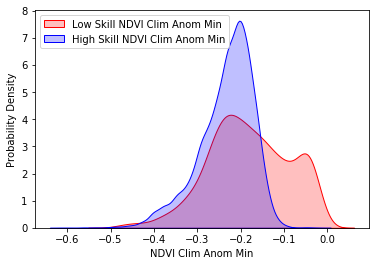

In [78]:
sns.kdeplot(list(min_low_ndvi_clim_anom), shade=True, color = 'r', Label= 'Low Skill NDVI Clim Anom Min')
sns.kdeplot(list(min_high_ndvi_clim_anom), shade=True, color = 'b', Label = 'High Skill NDVI Clim Anom Min')
plt.legend(loc = 2)
plt.xlabel('NDVI Clim Anom Min') 
plt.ylabel('Probability Density')

In [79]:
mean_low_ndvi_clim_anom = low_ndvi_clim_anom.mean(axis=0)
mean_high_ndvi_clim_anom = high_ndvi_clim_anom.mean(axis=0)

In [89]:
max_low_ndvi_clim_anom[max_low_ndvi_clim_anom <0.05]

32861     0.040705
38053     0.013455
219490    0.049775
222986    0.044478
223569    0.048706
225311    0.048979
225321    0.048148
228813    0.041008
228814    0.040186
230564    0.047246
259063    0.048636
dtype: float64

In [87]:
range_low_ndvi_origT[range_low_ndvi_origT <0.1]

32861     0.068806
38053     0.021244
74717     0.083642
129848    0.086648
130432    0.075824
130433    0.089950
131015    0.081381
131016    0.090904
134611    0.099444
218344    0.079599
218905    0.081130
219489    0.088786
219490    0.076374
220681    0.084552
222986    0.067745
222990    0.083603
223569    0.072886
223573    0.081260
224148    0.097895
224155    0.076729
224741    0.089762
225311    0.082181
225321    0.069530
225322    0.078179
226486    0.097652
228813    0.079331
228814    0.074639
229980    0.095191
230564    0.082640
234071    0.084757
dtype: float64

Why would places that have a low NDVI range and low max clim anomalies be difficult to forecast?

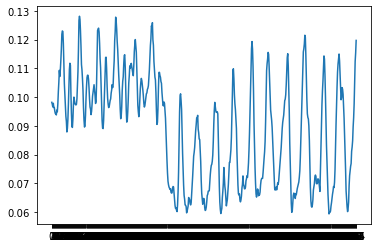

In [75]:
plt.plot(ndvi_orig_tableT[32861])

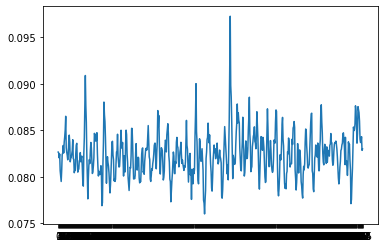

In [76]:
plt.plot(ndvi_orig_tableT[38053])

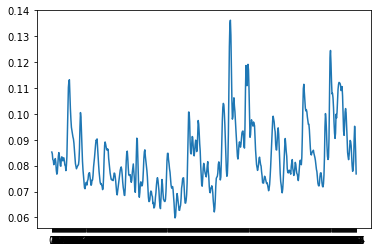

In [82]:
plt.plot(ndvi_orig_tableT[219490])

In [97]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [98]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)

In [99]:
dekads

DatetimeIndex(['2002-07-01', '2002-07-11', '2002-07-21', '2002-08-01',
               '2002-08-11', '2002-08-21', '2002-09-01', '2002-09-11',
               '2002-09-21', '2002-10-01',
               ...
               '2019-01-21', '2019-02-01', '2019-02-11', '2019-02-21',
               '2019-03-01', '2019-03-11', '2019-03-21', '2019-04-01',
               '2019-04-11', '2019-04-21'],
              dtype='datetime64[ns]', length=606, freq=None)

In [8]:
ndvi_simplex18 = pd.read_csv('/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/predictions_tables/ndvi_ea_simplex_ed6_pi18_anom.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])


In [11]:
ndvi_simplex18_prtp = pd.read_csv('/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/predictions_tables/ndvi_ea_simplex_ed6_pi18_anom_prtp.csv',delimiter=',', engine='c', low_memory=False, index_col=[0])

In [14]:
ndvi_simplex18T = ndvi_simplex18.T

In [15]:
ndvi_simplex18T

,0,1,2,3,4,5,6,7,8,9,...,609,610,611,612,613,614,615,616,617,618
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.450655,0.546554,0.982801,0.971472,1.293636,1.272178,0.855924,0.585819,0.189517,-0.922742
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.476726,0.437712,0.523015,1.107599,1.089754,1.109416,0.777960,0.259571,0.140615,0.203393
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.361329,0.836435,0.516046,0.967424,0.462156,0.504060,0.315089,0.055534,0.138936,0.529363
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.098110,0.442213,0.078566,0.630772,0.693804,0.888538,0.496933,0.219499,0.204151,0.139073
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.127095,0.387282,0.370027,0.808657,0.602542,0.712268,0.213619,0.051771,0.271929,0.534033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ndvi_simplex18_prtp 

,0,1,2,3,4,5,6,7,8,9,...,609,610,611,612,613,614,615,616,617,618
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.450601,0.546500,0.982747,0.971417,1.293581,1.272124,0.855869,0.585765,0.189463,-0.922796
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.476604,0.437590,0.522893,1.107477,1.089632,1.109293,0.777838,0.259450,0.140493,0.203271
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.361432,0.836538,0.516148,0.967527,0.462259,0.504162,0.315192,0.055637,0.139039,0.529466
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.098130,0.442233,0.078586,0.630792,0.693824,0.888558,0.496952,0.219519,0.204171,0.139093
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.127084,0.387271,0.370016,0.808645,0.602531,0.712258,0.213608,0.051760,0.271917,0.534022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ndvi_simplex18_sm10et = pd.read_csv('/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/predictions_tables/ndvi_ea_simplex_ed6_pi18_anom_sm10et.csv',delimiter=',', engine='c', low_memory=False, index_col=[0])

In [17]:
ndvi_simplex18_sm10et

,0,1,2,3,4,5,6,7,8,9,...,609,610,611,612,613,614,615,616,617,618
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.747514,0.710763,1.387136,1.520900,1.434155,1.317100,0.953583,0.470341,-0.133274,-1.152145
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.651893,0.811582,0.857912,1.413077,1.523578,1.455657,0.609130,0.203824,-0.155708,-0.522736
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.594074,0.882414,0.558121,1.193088,1.018131,0.815901,0.158095,-0.013998,0.460112,0.528084
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.029080,0.458665,0.492940,0.997607,0.993122,0.971967,0.534901,0.263754,0.155811,0.254728
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.602014,0.451835,0.316854,0.962725,0.313454,0.464898,0.181578,-0.215546,0.048216,0.427706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
ndvi_anom_table

,0,1,2,3,4,5,6,7,8,9,...,596,597,598,599,600,601,602,603,604,605
0,1.101671,0.981070,0.620074,1.039260,0.971371,1.218332,1.314077,0.860038,0.436575,-0.923461,...,0.052187,0.607037,0.299091,0.087679,0.888364,0.208073,0.522922,0.331863,0.306670,0.452332
1,1.267218,1.093294,0.497290,0.837557,0.751863,1.053565,1.296879,0.568543,0.507100,-0.746376,...,-0.552211,0.472806,1.089489,0.620203,0.721012,0.026296,0.110877,-0.081993,-0.136034,-0.100706
2,0.938137,0.873698,0.323125,0.609005,0.467435,0.704105,0.925546,0.078840,0.082710,-0.938589,...,-0.896644,0.159389,1.598763,1.185338,0.511467,-0.284296,-0.002413,-0.378869,-0.296636,-0.325362
3,1.100588,1.124495,0.514614,0.773013,0.481555,0.724557,1.117066,0.606488,0.704352,-0.368319,...,-1.029613,-0.110023,1.543944,1.252589,0.836019,0.197938,0.636307,-0.353615,0.203851,0.159405
4,1.324199,1.246212,1.014546,1.242413,1.118889,1.298449,1.357547,0.583769,0.628330,-0.148798,...,-1.256923,0.266702,1.426643,0.815910,0.039416,-0.367827,-0.054164,-0.445762,-0.584455,-0.573427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
ndvi_simplex18_sm10et.iloc[:,18:606].loc[high_cr_pix]

,18,19,20,21,22,23,24,25,26,27,...,596,597,598,599,600,601,602,603,604,605
69701,-0.728298,-0.863923,-0.987560,-0.981601,-1.001327,-0.994309,-0.861484,-0.914424,-0.950687,-0.919110,...,-0.948965,-0.960606,-0.974217,-0.943378,-0.936980,-0.890067,-0.782253,-0.665431,-0.809303,-0.905101
70286,-0.753159,-0.875582,-0.937995,-0.946030,-0.950945,-0.950849,-0.913038,-0.889006,-0.882691,-0.879629,...,-0.920259,-0.948954,-0.955654,-0.930170,-0.867853,-0.814647,-0.748451,-0.708543,-0.683488,-0.701374
70287,-0.753494,-0.851646,-0.888442,-0.895492,-0.900748,-0.905462,-0.883874,-0.897263,-0.926407,-0.995678,...,-0.895087,-0.928913,-0.937515,-0.951828,-0.864411,-0.812920,-0.762396,-0.714912,-0.659147,-0.632484
70288,-0.755803,-0.843009,-0.885193,-0.920881,-0.944883,-0.924366,-0.917205,-0.953386,-0.948019,-0.934912,...,-0.926054,-0.947648,-0.964091,-0.987903,-0.959350,-0.899091,-0.869070,-0.841156,-0.781493,-0.687742
71450,-0.748968,-0.819453,-0.915035,-0.961307,-0.976411,-0.987935,-0.939347,-0.950440,-0.950446,-0.915146,...,-0.928316,-0.954017,-0.969019,-0.945634,-0.935473,-0.942965,-0.924017,-0.936250,-0.880074,-0.838681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372272,1.064547,1.103108,1.167460,1.379509,1.440398,1.452240,1.418686,1.255038,1.071888,0.960226,...,0.768755,0.981687,1.104954,1.222562,1.344051,1.381538,1.304546,1.186927,0.848045,0.477305
380972,0.856681,1.146446,1.427033,1.551257,1.632303,1.574873,1.525045,1.294721,0.944862,0.789900,...,0.936928,1.145097,1.421704,1.538639,1.609439,1.664052,1.642764,1.293918,0.717941,0.111732
382709,0.658715,0.911580,1.253539,1.375896,1.567043,1.620467,1.566159,1.371048,0.977577,0.681933,...,0.416793,1.045585,1.309495,1.501883,1.383989,1.437763,1.362540,1.325449,0.664524,0.326875
383942,0.860430,1.159507,1.285285,1.345067,1.494741,1.507286,1.658788,1.628303,1.265136,1.028252,...,0.766995,1.044457,1.334347,1.521500,1.656054,1.505725,1.248904,0.944961,0.805700,0.392332


In [155]:
ndvi_anom_table.iloc[:,23:].loc[high_cr_pix].iloc[0,:]

23    -0.996007
24    -1.058835
25    -1.108922
26    -1.146951
27    -1.168257
         ...   
601   -0.880275
602   -0.924207
603   -0.984620
604   -1.022480
605   -1.042417
Name: 69701, Length: 583, dtype: float64

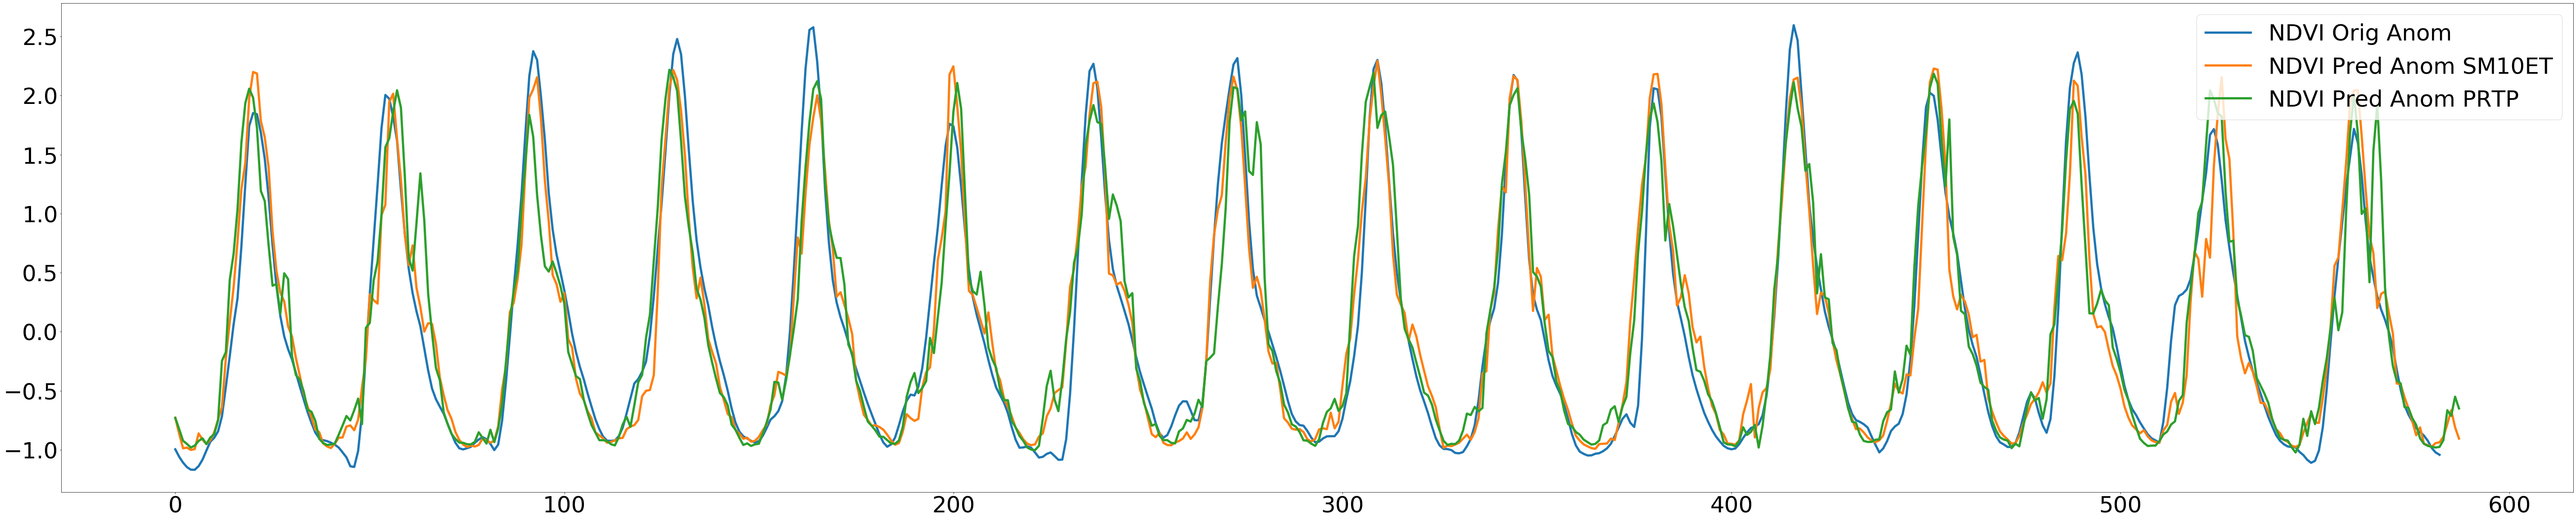

In [99]:
#maybe need to fix offset??

fig = plt.figure(figsize = (100,20))
plt.plot(list(range(0,583)), ndvi_anom_table.iloc[:,23:].loc[high_cr_pix].iloc[0,:], lw = 5, label = 'NDVI Orig Anom')
plt.plot(list(range(0,588)), ndvi_simplex18_sm10et.iloc[:,18:606].loc[high_cr_pix].iloc[0,:], lw = 5, label = 'NDVI Pred Anom SM10ET')
plt.plot(list(range(0,588)), ndvi_simplex18_prtp .iloc[:,18:606].loc[high_cr_pix].iloc[0,:], lw = 5, label = 'NDVI Pred Anom PRTP')
plt.tick_params(axis = 'both', which = 'major', labelsize = 50)
plt.legend(fontsize = 50)

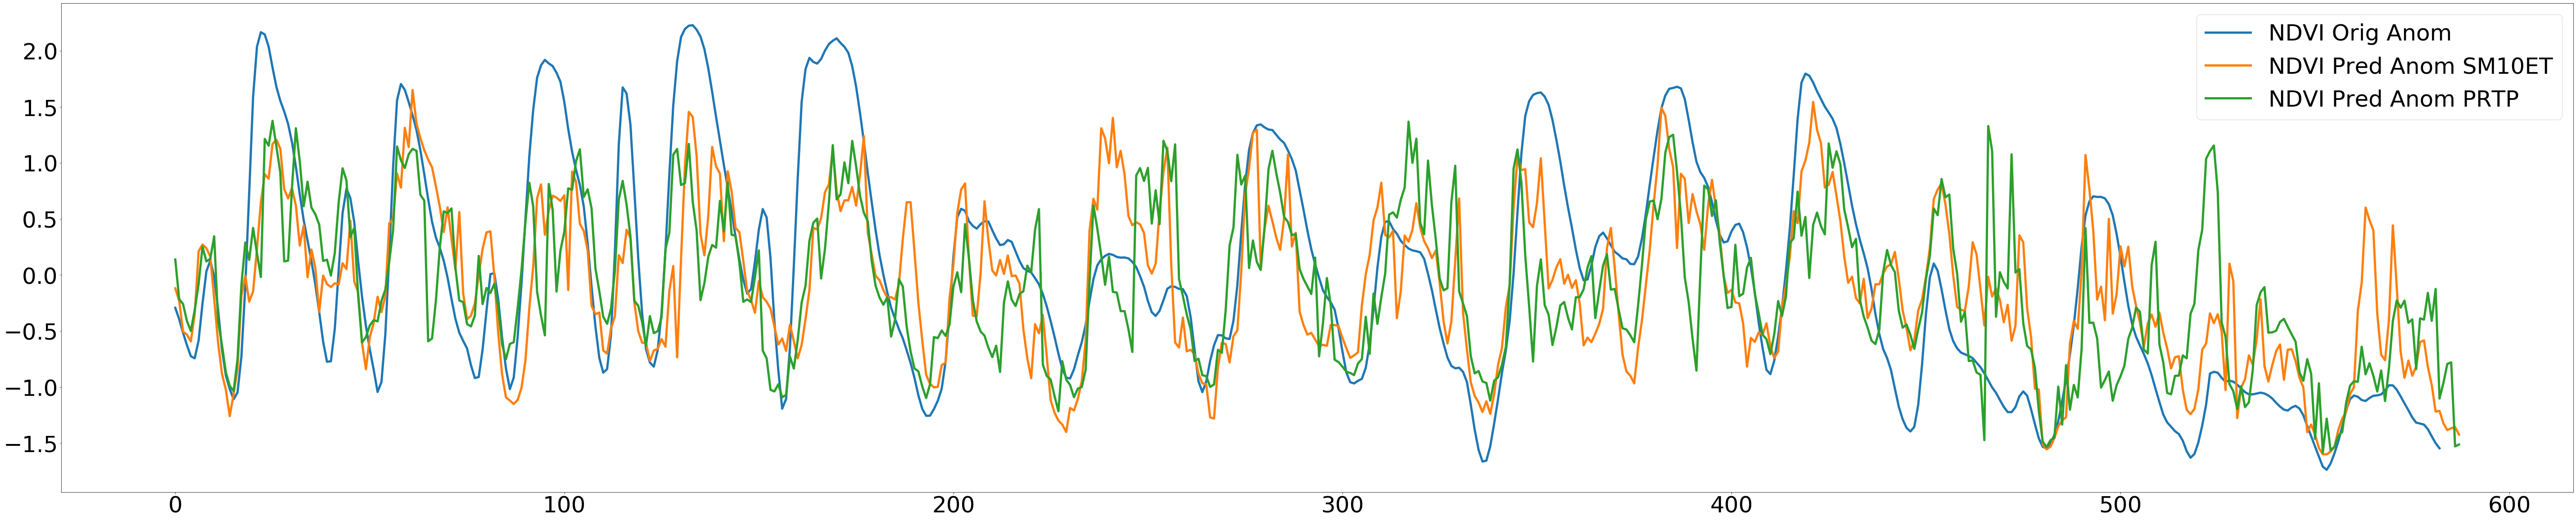

In [127]:
#maybe need to fix offset??

fig = plt.figure(figsize = (100,20))
plt.plot(list(range(0,583)), ndvi_anom_table.iloc[:,23:].loc[low_cr_pix].iloc[0,:], lw = 5, label = 'NDVI Orig Anom')
plt.plot(list(range(0,588)), ndvi_simplex18_sm10et.iloc[:,18:606].loc[low_cr_pix].iloc[0,:], lw = 5, label = 'NDVI Pred Anom SM10ET')
plt.plot(list(range(0,588)), ndvi_simplex18_prtp .iloc[:,18:606].loc[low_cr_pix].iloc[0,:], lw = 5, label = 'NDVI Pred Anom PRTP')
plt.tick_params(axis = 'both', which = 'major', labelsize = 50)
plt.legend(fontsize = 50)

In [ ]:
#remove low range NDVI values, check what their anomaly values are, are they within the same range as other anomalies?

# Update LC_pixels_skill df with NDVI min, max, range

In [162]:
ndvi_orig_tableTmax = pd.DataFrame(ndvi_orig_tableT.max(), columns = {'max'})

In [163]:
ndvi_orig_tableTmax['min'] = ndvi_orig_tableT.min()

In [ ]:
# ndvi_orig_tableTmax['range'] = ndvi_orig_tableT.max() - ndvi_orig_tableT.min()

In [165]:
ndvi_orig_tableTmax

,max,min,range
0,0.099490,0.080830,0.018660
1,0.102076,0.082318,0.019757
2,0.103641,0.082436,0.021205
3,0.099378,0.082417,0.016961
4,0.103537,0.083903,0.019633
...,...,...,...
392937,NaN,NaN,NaN
392938,NaN,NaN,NaN
392939,NaN,NaN,NaN
392940,NaN,NaN,NaN


In [148]:
#ndvi_orig_tableTmax['threshold'] = [1 if x < 0.5 else 2 for x in ndvi_orig_tableTmax['max']]

In [149]:
#ndvi_orig_tableTmax.loc[(ndvi_orig_tableTmax['max'].isnull()), 'threshold'] = 0

In [166]:
ndvi_orig_tableTmax.insert(0, 'pixel_id', list(range(0,392942)))

In [168]:
#lc_pixels_skill_max = pd.merge(lc_pixels_skill, ndvi_orig_tableTmax, on='pixel_id', how='inner')
lc_pixels_skill_range = pd.merge(lc_pixels_skill, ndvi_orig_tableTmax, on='pixel_id', how='inner')


In [141]:
#lc_pixels_skill_max.to_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill_max.csv')

In [169]:
lc_pixels_skill_range.to_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill_range.csv')

In [170]:
lc_pixels_skill_range

,pixel_id,LC,skill,max,min,range
0,863,shrubland,0.660811,0.094605,0.054783,0.039822
1,2046,grassland,0.366358,0.114209,0.071323,0.042886
2,2518,cropland_irrigated,0.495580,0.101576,0.014916,0.086660
3,2629,grassland,0.335566,0.120070,0.066010,0.054060
4,3098,cropland_irrigated,0.407682,0.243059,0.023583,0.219475
...,...,...,...,...,...,...
113170,392068,woodland,0.956308,0.802896,0.333333,0.469563
113171,392069,woodland,0.961195,0.801445,0.321727,0.479718
113172,392646,woodland,0.953059,0.796091,0.312679,0.483412
113173,392648,woodland,0.949436,0.776633,0.319299,0.457335


In [158]:
lc_pixels_skill_max[(lc_pixels_skill_max.skill > 0.9) & (lc_pixels_skill_max.threshold == 1)]['LC'].unique()

array(['cropland_irrigated', 'grassland', 'shrubland', 'cropland_rainfed'],
      dtype=object)

In [160]:
lc_pixels_skill_max[(lc_pixels_skill_max.skill < 0.1) & (lc_pixels_skill_max.threshold == 1)]

,pixel_id,LC,skill,max,threshold
80,32861,cropland_irrigated,-0.069985,0.128139,1
105,38053,cropland_irrigated,0.068255,0.097270,1
179,47983,cropland_irrigated,-0.030579,0.424171,1
240,52709,grassland,0.036625,0.227064,1
250,53295,grassland,-0.043552,0.236130,1
...,...,...,...,...,...
93970,270168,cropland_rainfed,-0.039524,0.408980,1
94334,271915,cropland_rainfed,0.072657,0.378710,1
94730,273664,cropland_rainfed,0.068982,0.463069,1
95677,277729,cropland_rainfed,0.071347,0.461725,1


In [161]:
lc_pixels_skill_max[(lc_pixels_skill_max.skill < 0.1) & (lc_pixels_skill_max.threshold == 2)]

,pixel_id,LC,skill,max,threshold
1916,77175,grassland,-0.204772,0.526862,2
2038,77758,cropland_irrigated,-0.281025,0.574879,2
7693,94072,cropland_irrigated,-0.179438,0.562904,2
7694,94073,cropland_irrigated,-0.062008,0.557882,2
7935,94655,cropland_irrigated,-0.229337,0.509861,2
...,...,...,...,...,...
107770,338484,woodland,0.002799,0.796172,2
109028,346011,woodland,0.096989,0.844394,2
109088,346594,cropland_rainfed,0.077552,0.842339,2
109687,351829,cropland_rainfed,0.020059,0.833098,2


In [ ]:
bo_smet_skill = np.nan_to_num(ndvi_multi_anom_bo_ed6_pi18_clip.read(1), copy=True, nan=0.0, posinf=None, neginf=None)
ci_smet_skill = np.nan_to_num(ndvi_multi_anom_ci_ed6_pi18_clip.read(1), copy=True, nan=0.0, posinf=None, neginf=None)
gr_smet_skill = np.nan_to_num(ndvi_multi_anom_gr_ed6_pi18_clip.read(1), copy=True, nan=0.0, posinf=None, neginf=None)
sh_smet_skill = np.nan_to_num(ndvi_multi_anom_sh_ed6_pi18_clip.read(1), copy=True, nan=0.0, posinf=None, neginf=None)
cr_smet_skill = np.nan_to_num(ndvi_multi_anom_cr_ed6_pi18_clip.read(1), copy=True, nan=0.0, posinf=None, neginf=None)